In [ ]:
# Modelo de clasificación

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf

In [47]:
data_raw = load_iris()
X = data_raw.data 
y = data_raw.target

In [49]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [51]:
# One hot encoding: convierte etiquetas numericas en vectores binarios
y1 = tf.keras.utils.to_categorical(y, num_classes=3)
#print(y1)

In [53]:
# Normaliza todas las características a la misma escala
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size = 0.3)
n_vars = X_train.shape[1]
n_vars # longitud sepalo, ancho sepalo, longitud petalom ancho petalo

4

In [57]:
modelo = Sequential()
#El número de neuronas de salida es 3 porque tenemos 3 clases de iris: Setosa, Versicolor, Virginica
modelo.add(Dense(3, input_shape=(n_vars,), activation='softmax'))
modelo.summary()

# Número de parámetros = (entradas × neuronas) + neuronas

C:\Users\34665\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
num_epochs = 500
bs = 10

In [61]:
modelo.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])


In [63]:
historico = modelo.fit(X_train, y_train, epochs=num_epochs, batch_size=bs, validation_split=0.2, verbose=0)

In [65]:
historico.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

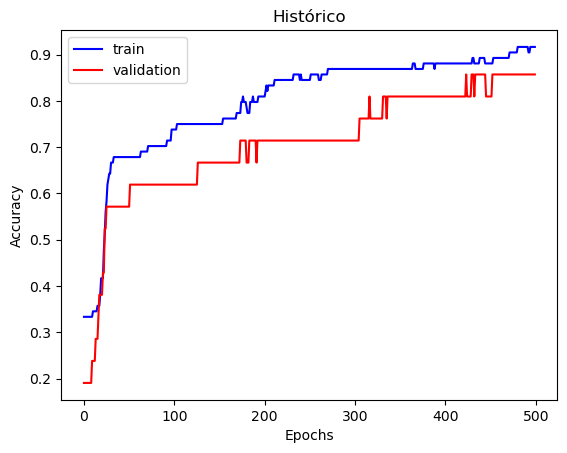

In [67]:
plt.plot(historico.history["accuracy"], c="b")
plt.plot(historico.history["val_accuracy"], c="r")
plt.title("Histórico")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "validation"])

In [1]:
ACC = modelo.evaluate(X_test, y_test)
print("Accuracy: ", ACC[1])

NameError: name 'modelo' is not defined